In [22]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import numpy as np
import pandas as pd
import pandas_datareader as web
from datetime import datetime


In [23]:
start = datetime(2018,1,1)
end = datetime(2020,1,1)
dates = pd.date_range(start, end)

In [32]:
tickers = ['GOOGL','FB','AAPL','NFLX','AMZN','TSLA']

price_data = []
for ticker in range(len(tickers)):
    prices = web.DataReader(tickers[ticker], start=start, end =end, data_source='yahoo')
    price_data.append(prices[['Adj Close']])
    
EQ_DF = pd.concat(price_data, axis=1)
EQ_DF.columns=tickers
EQ_DF.tail()

,GOOGL,FB,AAPL,NFLX,AMZN,TSLA
Date,,,,,,
2019-12-24,1344.430054,205.119995,70.459007,333.200012,1789.209961,85.050003
2019-12-26,1362.469971,207.789993,71.856941,332.630005,1868.770020,86.188004
2019-12-27,1354.640015,208.100006,71.829674,329.089996,1869.800049,86.075996
2019-12-30,1339.709961,204.410004,72.255997,323.309998,1846.890015,82.940002
2019-12-31,1339.390015,205.250000,72.783936,323.570007,1847.839966,83.666000


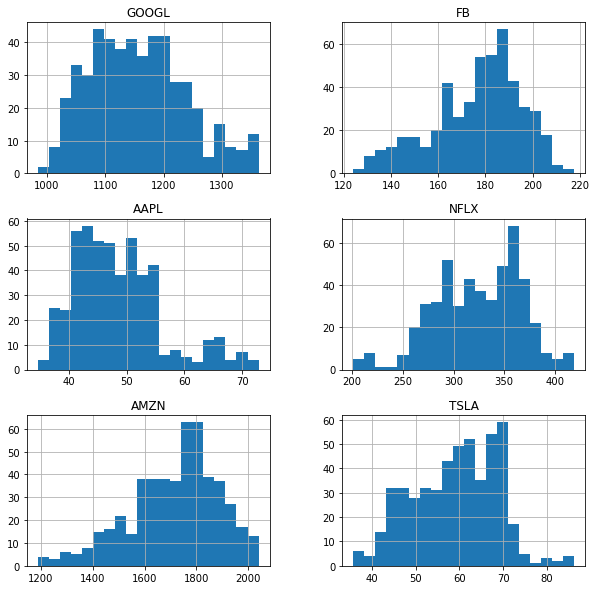

In [33]:
EQ_DF.hist(bins=20, figsize=(10,10))
plt.show()

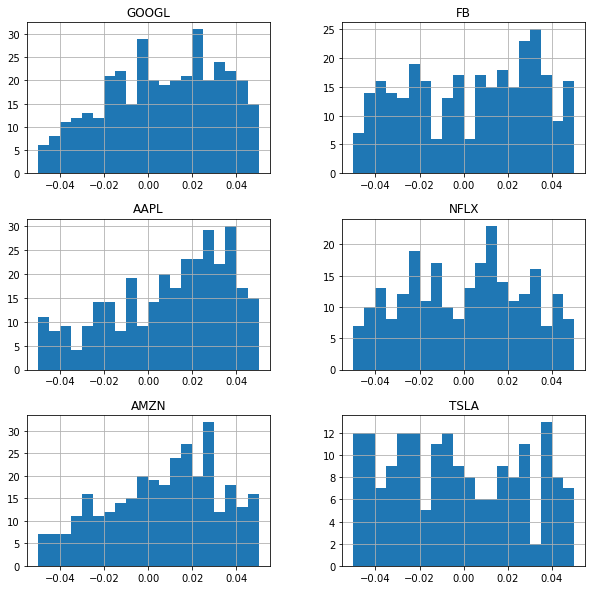

In [34]:
EQ_Returns = (EQ_DF/EQ_DF.shift(10))-1
EQ_Returns.hist(bins=20, range=(-0.05, 0.05), figsize=(10,10))
plt.show()

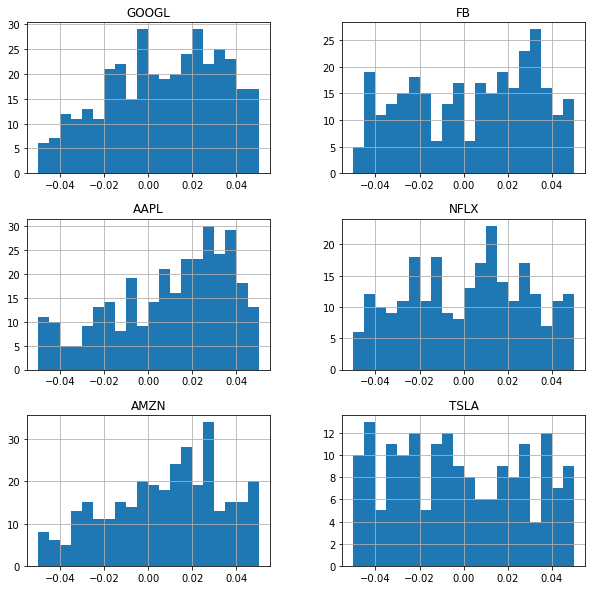

In [35]:
EQ_DF_LogReturns = np.log(EQ_DF/EQ_DF.shift(10))
EQ_DF_LogReturns.hist(bins=20, range=(-0.05, 0.05), figsize=(10,10))
plt.show()

## VaR Calculation

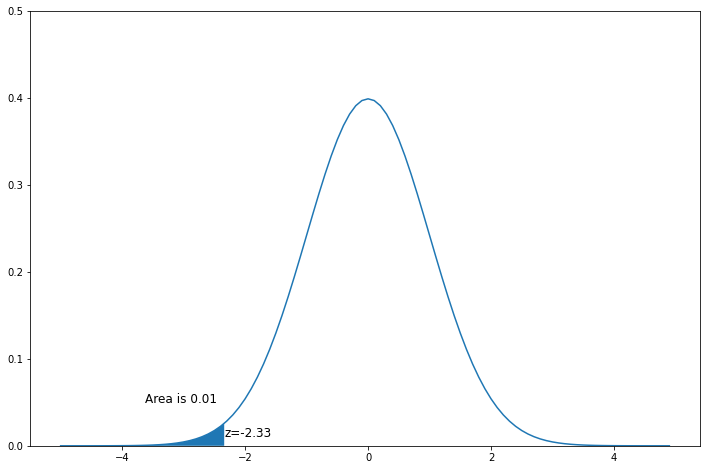

In [36]:
# We use z to define how many standard deviations away from the mean
# Here we use z = -2.33 to get to a 99% confidence interval. Why 99% will be obvious once we plot out the distribution
z = -2.33

plt.figure(figsize=(12,8))
# plotting the normal distribution, using the scipy stats norm function
plt.ylim(0, 0.5)
x = np.arange(-5,5,0.1)
y1 = stats.norm.pdf(x)
plt.plot(x, y1)

x2 = np.arange(-5, z, 0.01) # we use this range from the -ve end to -2.33 to compute the area
sum = 0
# s = np.arange(-10,z,0.01)
for i in x2:
    sum+=stats.norm.pdf(i)*0.01 # computing area under graph from -5 to -2.33 in steps of 0.01

plt.annotate('Area is ' + str(round(sum,3)), xy = (z-1.3, 0.05), fontsize=12)
plt.annotate('z=' + str(z), xy=(z, 0.01), fontsize=12)
plt.fill_between(x2, stats.norm.pdf(x2))
plt.show()

In [37]:

z_95 = stats.norm.ppf(1-0.95)
z_99 = stats.norm.ppf(1-0.99)
z_999 = stats.norm.ppf(1-0.999)

print('95%, 99%, 99.9% Z =', z_95, z_99, z_999)

95%, 99%, 99.9% Z = -1.6448536269514722 -2.3263478740408408 -3.090232306167813


In [38]:
confidence = 0.99
Z = stats.norm.ppf(1-confidence)
mean = np.mean(EQ_Returns)
stddev = np.std(EQ_Returns)

In [39]:
EQ_DF.dropna().iloc[-1,:]*Z*stddev

GOOGL   -136.443343
FB       -29.003472
AAPL      -9.378278
NFLX     -64.569683
AMZN    -238.980456
TSLA     -20.468330
dtype: float64

In [61]:
EQ_DF.dropna().iloc[-1,:]*z_999*stddev

GOOGL   -181.246163
FB       -38.527112
AAPL     -12.457749
NFLX     -85.771918
AMZN    -317.452576
TSLA     -27.189353
dtype: float64

In [76]:
last_close = EQ_DF.GOOGL.tail(1)[0]
prior_close = EQ_DF.GOOGL.tail(2)[0]
rets_1 = (last_close / prior_close) - 1

mean = np.mean(rets_1)
std = np.std(rets_1)
Z_99 = stats.norm.ppf(1-0.99)
price = last_close
print(mean, std, Z_99, price)

print(rets_1)

-0.00023881757872323828 0.0 -2.3263478740408408 1339.3900146484375
-0.00023881757872323828


In [77]:
np.random.seed(42)
n_sims = 1000
sim_returns = np.random.normal(mean, std, n_sims)
SimVAR = price * np.percentile(sim_returns, 1)
print('Simulated VAR is ', SimVAR)

Simulated VAR is  -0.3198698802644225


In [78]:
ParamVAR = price*Z_99*std

print('Parametric VAR is {0:.3f}'.format(ParamVAR))

Parametric VAR is -0.000
